## Netflix EDA

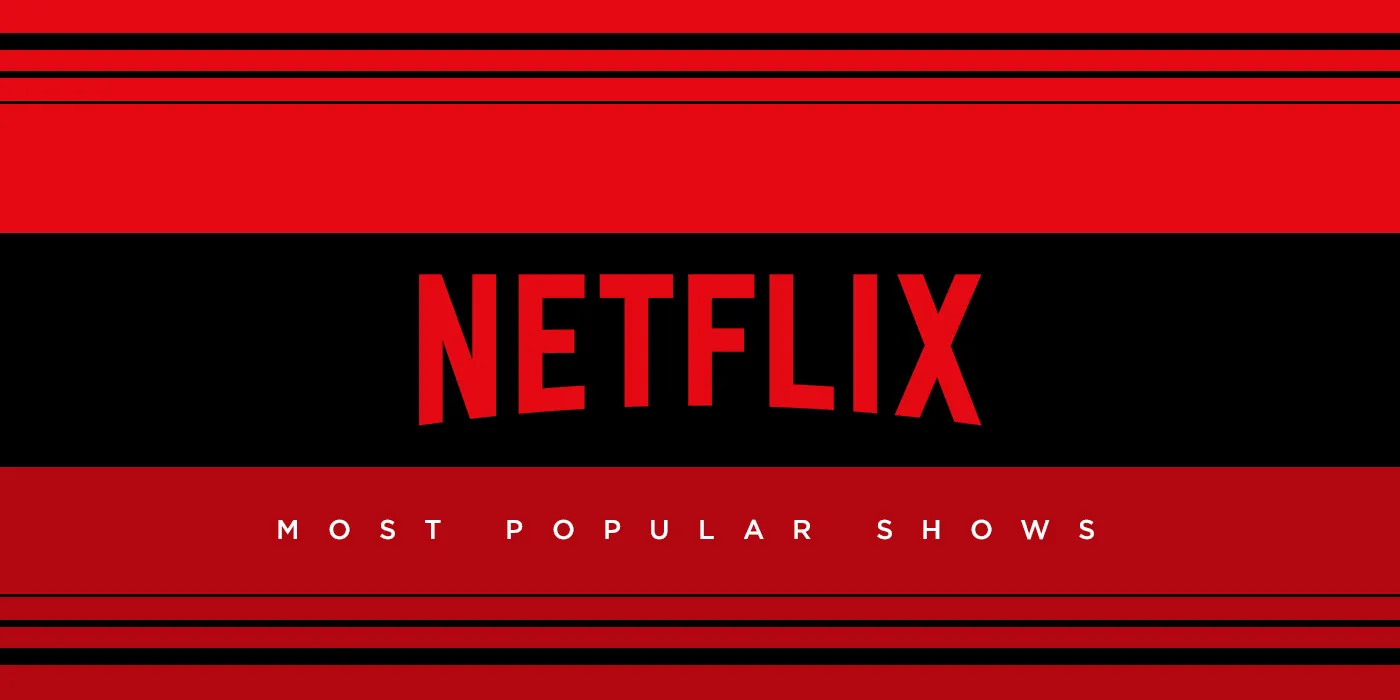

In [4]:
pip install pandas_profiling

  Using cached https://files.pythonhosted.org/packages/45/83/6dc308c763d00c6d3ee66c4dcf06b2d020bc774326ee03bf23076a5f25ce/pandas_profiling-3.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/47/bb/849011636c4da2e44f1253cd927cfb20ada4374d8b3a4e425416e84900cc/tqdm-4.64.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b7/b3/e327612b67b2ab93749e648a92e5463cba763e7d4e8c74f69551133df076/phik-0.12.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/df/3f/6093a23565d0f50ce433f56223fcc34af6c912cd4331dc582ba29d9b5a17/matplotlib-3.5.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/bc/c3/f068337a370801f372f2f8f6bad74a5c140f6fda3d9de154052708dd3c65/Jinja2-3.1.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b2/56/f886ed6f1777ffa9d54c6e80231b69db8a1f52dcc33f5967b06a105dcfe0/pandas-1.3.5-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.or

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)")': /simple/visions/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProtocolError('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))': /simple/visions/
statsmodels 0.13.5 has requirement numpy>=1.17; python_version != "3.10" or platform_system != "Windows" or platform_python_implementation == "PyPy", but you'll have numpy 1.16.2 which is incompatible.
seaborn 0.12.2 has requirement numpy!=1.24.0,>=1.17, but you'll have numpy 1.16.2 which is incompatible.
scipy 1.7.3 has requirement numpy<1.23.0,>=1.16.5, but you'll have numpy 1.16.2 which is incompatible.
pandas 1.3.5 has requirement numpy>=1.17.3; platform_machine != "aarch64" and plat

In [5]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#import pandas_profiling as prf

In [7]:
netflix = pd.read_csv("netflix_data.csv")
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
Unnamed: 0      8807 non-null int64
show_id         8807 non-null object
type            8807 non-null object
title           8807 non-null object
director        6173 non-null object
cast            7982 non-null object
country         7976 non-null object
date_added      8797 non-null object
release_year    8807 non-null int64
rating          8803 non-null object
duration        8804 non-null object
listed_in       8807 non-null object
description     8807 non-null object
dtypes: int64(2), object(11)
memory usage: 894.5+ KB


# About Data
### This dataset contains data collected from Netflix of different TV shows and movies from the year 2008 to 2021.

- type: Gives information about 2 different unique values one is TV Show and another is Movie
- title: Gives information about the title of Movie or TV Show
- director: Gives information about the director who directed the Movie or TV Show
- cast: Gives information about the cast who plays role in Movie or TV Show
- release_year: Gives information about the year when Movie or TV Show was released
- rating: Gives information about the Movie or TV Show are in which category (eg like the movies are only for students, or adults, etc)
- duration: Gives information about the duration of Movie or TV Show
- listed_in: Gives information about the genre of Movie or TV Show
- description: Gives information about the description of Movie or TV Show

In [8]:
m=netflix.isnull().sum()
miss= (netflix.isnull().sum()/len(netflix))*100
miss_data=pd.concat([m,miss],axis=1,keys=['Total','%'])
print(miss_data)

              Total          %
Unnamed: 0        0   0.000000
show_id           0   0.000000
type              0   0.000000
title             0   0.000000
director       2634  29.908028
cast            825   9.367549
country         831   9.435676
date_added       10   0.113546
release_year      0   0.000000
rating            4   0.045418
duration          3   0.034064
listed_in         0   0.000000
description       0   0.000000


## Dropping the cast and director features because we are not going to use those features right now


In [9]:
netflix = netflix.dropna( how='any',subset=['cast', 'director'])

In [10]:
netflix.fillna({ 'country': 'missing', 'rating': 'missing'}, inplace=True)
netflix.isnull().sum()

Unnamed: 0      0
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64

In [11]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


In [12]:
## Finding how many unique values are there in the dataset
netflix.nunique()

Unnamed: 0      5700
show_id         5700
type               2
title           5698
director        4152
cast            5512
country          604
date_added      1478
release_year      72
rating            18
duration         205
listed_in        346
description     5677
dtype: int64

In [13]:
netflix.describe(include='all')

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5700.000000,5700,5700,5700,5700,5700,5700,5700,5700.000000,5700,5697,5700,5700
unique,NaN,5700,2,5698,4152,5512,604,1478,NaN,18,205,346,5677
top,NaN,s3010,Movie,15-Aug,"Raúl Campos, Jan Suter","Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,2020-01-01 00:00:00,NaN,TV-MA,94 min,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,NaN,1,5522,2,18,13,1849,97,NaN,1939,140,361,4
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,4551.407018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.979474,NaN,NaN,NaN,NaN
std,2590.214753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.562133,NaN,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,2276.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN


# EDA

-  What different types of show or movie are uploaded on Netflix?

- Correlation between the features
- Most watched shows on the Netflix
- Distribution of Ratings
- Which has the highest rating Tv show or Movies
- Finding the best Month for releasing content
- Highest watched genres on Netflix
- Released movie over the years

In [14]:
##method-1
netflix.groupby('type')['title'].count().sort_values(ascending = False)

type
Movie      5522
TV Show     178
Name: title, dtype: int64

In [15]:
##method-2
netflix.type.value_counts().to_frame('values_count')

,values_count
Movie,5522
TV Show,178


In [16]:
netflix.corr()

,Unnamed: 0,release_year
Unnamed: 0,1.000000,-0.199716
release_year,-0.199716,1.000000


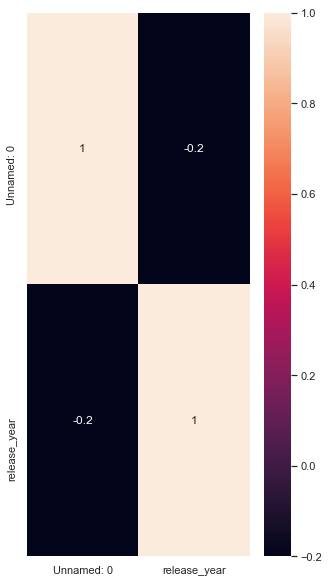

In [17]:
sns.set()
plt.subplots(figsize=(5,10))
sns.heatmap(netflix.corr(),annot=True)

In [ ]:
## IMPORT PANDAS_PROFILING FOR PROFILE_REPORT
import pandas_profiling as prf

In [ ]:
## THIS WILL RETURN US A PROFILEREPORT ON DATASET WHERE WE CAN SEE EVERY DATA AND VISUALISE ITS.
netflix_profile = prf.ProfileReport(netflix)
netflix_profile

In [ ]:
## DOWNLOADING  A COPY OF PROFILR REPORT
netflix_profile.to_file(output_file="Movies_before_preprocessing.html")

In [22]:
# THIS WILL RETURN US NAME OF MOVIES AND TV Show ON WHAT IS RELEASE YEAR. 
netflix.groupby(["type","release_year"])["title"].agg(pd.Series.mode)

type     release_year
Movie    1942                                         The Battle of Midway
         1944                                             Tunisian Victory
         1945                                      Know Your Enemy - Japan
         1946                           [Let There Be Light, The Stranger]
         1947                                                  Thunderbolt
                                               ...                        
TV Show  2015            [Akulah Balqis, Gonul, Hemlock Grove, Hjørdis,...
         2016            [46, Bring It On, Ghost, Cheese in the Trap, H...
         2017            [Abnormal Summit, Ari Shaffir: Double Negative...
         2018            [A.I.C.O., Age of Rebellion, Bitter Daisies, B...
         2019            [7 (Seven), Arrow, Bolívar, Comedians in Cars ...
Name: title, Length: 81, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'TV-G'),
  Text(1, 0, 'TV-14'),
  Text(2, 0, 'TV-MA'),
  Text(3, 0, 'TV-PG'),
  Text(4, 0, 'R'),
  Text(5, 0, 'TV-Y7'),
  Text(6, 0, 'TV-Y'),
  Text(7, 0, 'PG'),
  Text(8, 0, 'G'),
  Text(9, 0, 'PG-13'),
  Text(10, 0, 'NR'),
  Text(11, 0, 'UR'),
  Text(12, 0, 'TV-Y7-FV'),
  Text(13, 0, 'missing'),
  Text(14, 0, 'NC-17')])

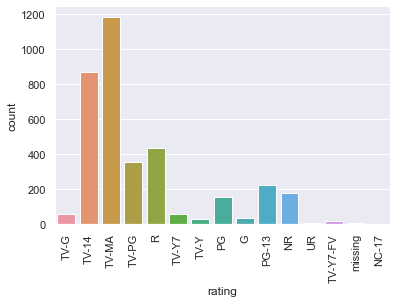

In [26]:
sns.countplot(x=netflix['rating'],orient = 'v')
plt.xticks(rotation = 90)


# EDA

-  What different types of show or movie are uploaded on Netflix?

- Correlation between the features
- Most watched shows on the Netflix
- Distribution of Ratings
- Which has the highest rating Tv show or Movies
- Finding the best Month for releasing content
- Highest watched genres on Netflix
- Released movie over the years

In [29]:
netflix.groupby("type")["rating"].agg(pd.Series.mode)

type
Movie      TV-MA
TV Show    TV-14
Name: rating, dtype: object

In [28]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,missing,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie


In [69]:
new_genre = netflix['listed_in'].str.split(",",2)

In [31]:
new_genre

1                  [Documentaries,  International Movies]
2              [Comedies,  Dramas,  International Movies]
3       [Dramas,  Independent Movies,  International M...
5           [Comedies,  International Movies,  Thrillers]
6       [Dramas,  Independent Movies,  International M...
                              ...                        
5831                      [Dramas,  International Movies]
5832                        [Cult Movies,  Horror Movies]
5833                                      [Horror Movies]
5834                      [Dramas,  International Movies]
5836            [Dramas,  Independent Movies,  Thrillers]
Name: listed_in, Length: 3588, dtype: object

## Adding new features

In [70]:
netflix['Genre 1'] = new_genre.str.get(0)
netflix['Genre 2'] = new_genre.str.get(1)
netflix['Genre 3'] = new_genre.str.get(2)

In [71]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Genre 1,Genre 2,Genre 3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,missing,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,Comedies,International Movies,Thrillers
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,Dramas,Independent Movies,International Movies


In [73]:
netflix['Genre 1'].describe(include='all')

count       3588
unique        30
top       Dramas
freq         988
Name: Genre 1, dtype: object

In [72]:
netflix['Genre 2'].describe(include='all')

count                      2788
unique                       32
top        International Movies
freq                       1003
Name: Genre 2, dtype: object

In [74]:
netflix['Genre 3'].describe(include='all')

count                      1500
unique                       27
top        International Movies
freq                        569
Name: Genre 3, dtype: object

In [37]:
netflix.drop('listed_in',axis = 1,inplace = True)

In [38]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,description,type,Genre 1,Genre 2,Genre 3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,missing,2019-11-30,2019,TV-G,67 min,"From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107 min,Nollywood star Ramsey Nouah learns that someon...,Movie,Comedies,International Movies,Thrillers
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Romance, mystery and adventure intertwine as a...",Movie,Dramas,Independent Movies,International Movies


In [75]:
netflix.drop_duplicates(subset = None,keep='first',inplace=False)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Genre 1,Genre 2,Genre 3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,missing,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,Comedies,International Movies,Thrillers
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,Dramas,Independent Movies,International Movies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5831,70154110,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France",2011-05-17,2010,NR,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...,Movie,Dramas,International Movies,NaN
5832,70141644,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,2010-11-01,1987,NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",Movie,Cult Movies,Horror Movies,NaN
5833,70127998,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,2009-11-18,2009,TV-14,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",Movie,Horror Movies,NaN,NaN
5834,70084180,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,2009-05-05,2007,NR,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,Movie,Dramas,International Movies,NaN


__Q1)__ Movies made on year basis?

In [76]:
netflix.groupby(['Genre 1'])['release_year'].count().sort_values(ascending = False)

Genre 1
Dramas                          988
Comedies                        714
Action & Adventure              523
Documentaries                   309
Children & Family Movies        290
Stand-Up Comedy                 244
Horror Movies                   184
International Movies             72
Classic Movies                   40
Thrillers                        37
Movies                           29
International TV Shows           26
Crime TV Shows                   19
British TV Shows                 17
Independent Movies               16
Music & Musicals                 12
Sci-Fi & Fantasy                 10
Anime Features                    9
Kids' TV                          8
Cult Movies                       8
Docuseries                        7
Anime Series                      7
Stand-Up Comedy & Talk Shows      5
TV Shows                          5
Romantic Movies                   2
TV Action & Adventure             2
TV Comedies                       2
Classic & Cult TV   

In [42]:
netflix.groupby(['Genre 2'])['release_year'].count().sort_values(ascending = False)

Genre 2
 International Movies        1003
 Dramas                       451
 Independent Movies           387
 Comedies                     249
 Thrillers                    139
 Romantic Movies               86
 Music & Musicals              72
 Sci-Fi & Fantasy              71
 Sports Movies                 50
 Horror Movies                 36
 Faith & Spirituality          36
 Anime Features                31
 Cult Movies                   27
 International TV Shows        21
 Children & Family Movies      17
 LGBTQ Movies                  16
 Classic Movies                13
 TV Comedies                   13
 TV Dramas                     12
 Documentaries                 11
 Korean TV Shows                9
 Stand-Up Comedy                8
 Romantic TV Shows              7
 TV Action & Adventure          5
 Docuseries                     5
 Crime TV Shows                 4
 TV Sci-Fi & Fantasy            3
 Kids' TV                       2
 Science & Nature TV            1
 Class

In [77]:
netflix.groupby(['Genre 3'])['release_year'].count().sort_values(ascending = False)

Genre 3
 International Movies            569
 Romantic Movies                 244
 Thrillers                       174
 Music & Musicals                113
 Independent Movies              109
 Sci-Fi & Fantasy                 77
 Sports Movies                    64
 LGBTQ Movies                     34
 Dramas                           33
 TV Dramas                        20
 Cult Movies                       6
 Faith & Spirituality              6
 Spanish-Language TV Shows         6
 Romantic TV Shows                 5
 Comedies                          5
 International TV Shows            4
 TV Action & Adventure             4
 Horror Movies                     4
 Classic Movies                    4
 Stand-Up Comedy & Talk Shows      3
 TV Horror                         3
 TV Mysteries                      3
 TV Thrillers                      3
 TV Comedies                       2
 TV Sci-Fi & Fantasy               2
 Teen TV Shows                     2
 Korean TV Shows              

In [78]:
##no of movies & tv shows released by year arranged in descedning order
netflix.groupby(['release_year'])['release_year'].count().sort_values(ascending=False)

release_year
2017    572
2018    562
2016    513
2015    319
2019    312
       ... 
1969      1
1944      1
1972      1
1977      1
1942      1
Name: release_year, Length: 67, dtype: int64

Observation:

From the above we can see that with passing years more movies are being made year by year

The above data shows that there is a sudden increase in the creation of movies in year 2016 as compared to year 2015

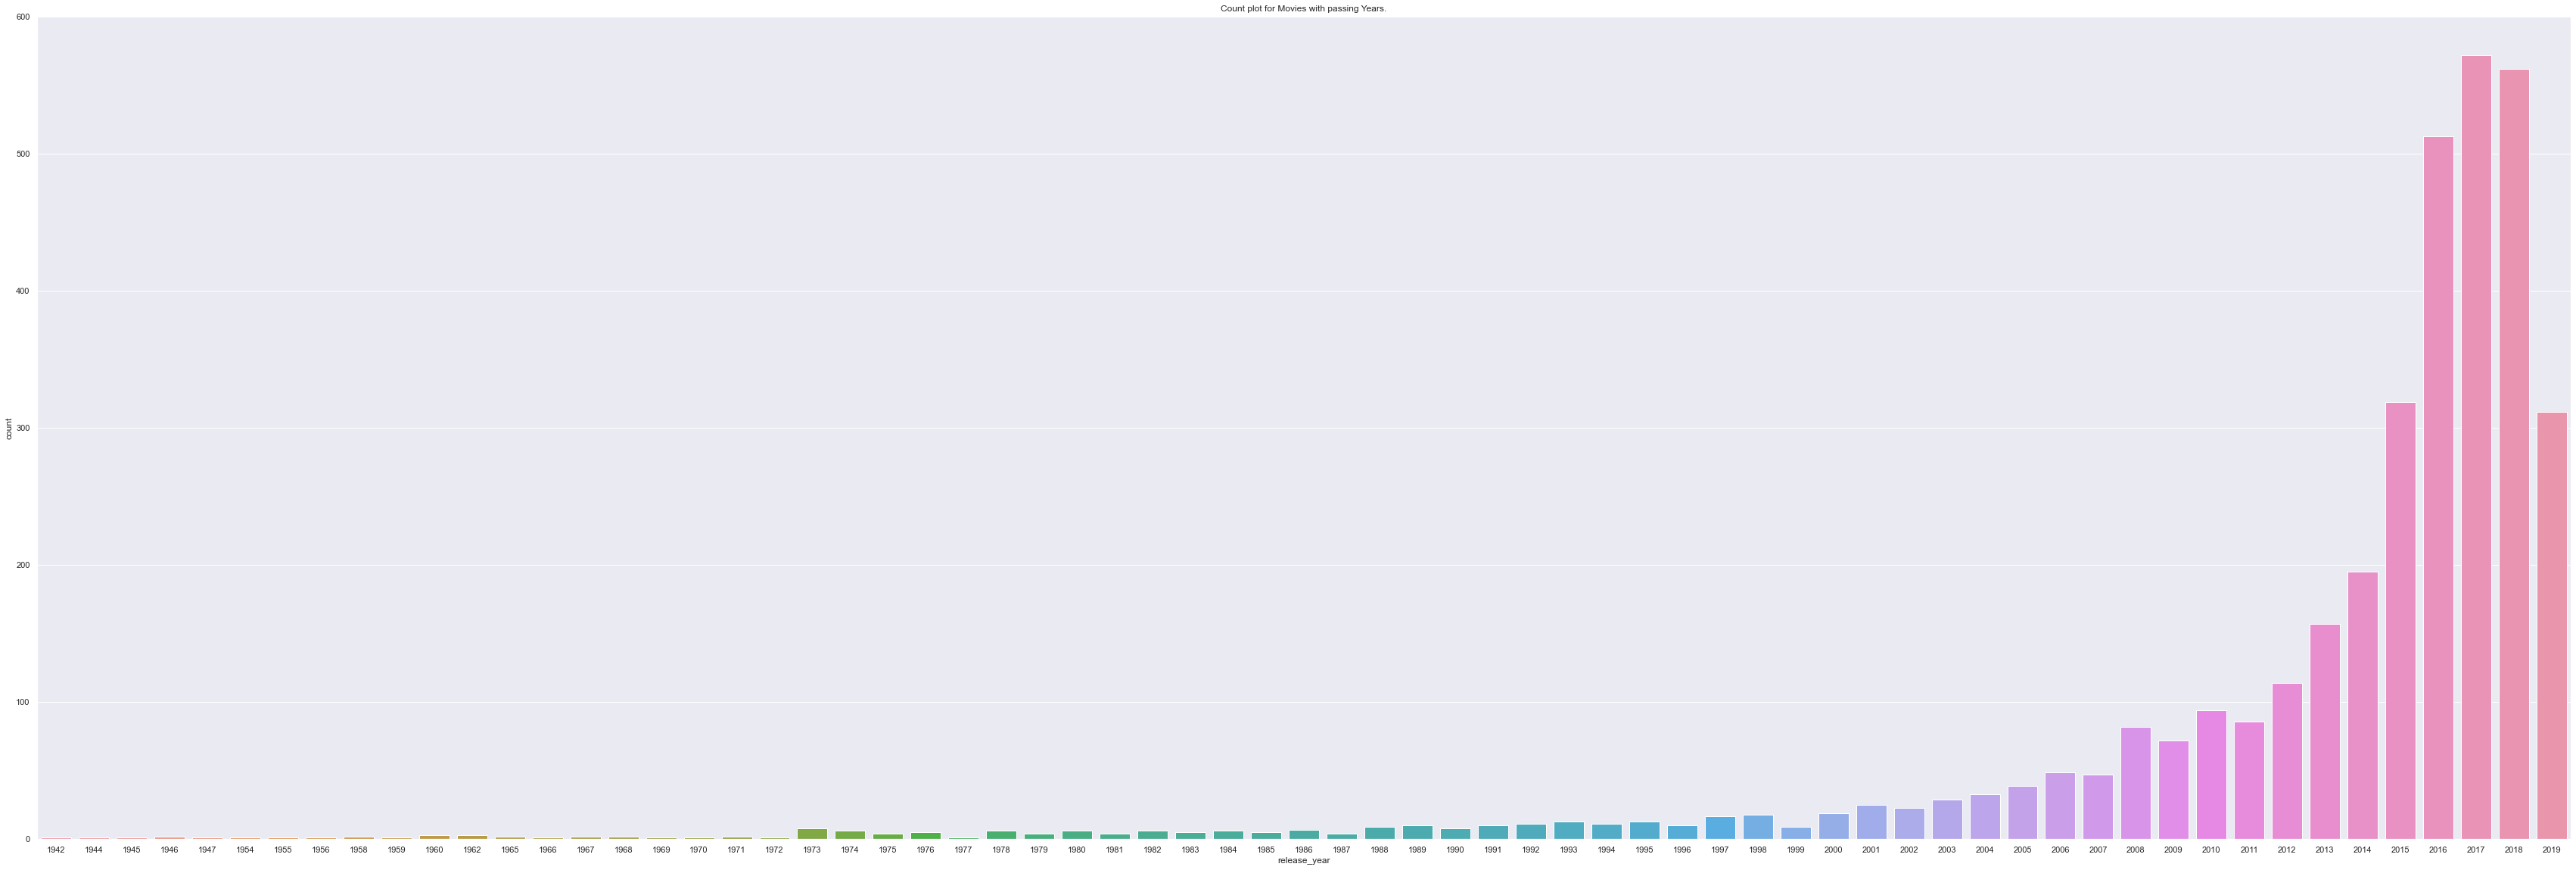

In [79]:
sns.countplot(x='release_year', data=netflix).set_title('Count plot for Movies with passing Years.')
sns.set(rc={'figure.figsize':(60,20)})
plt.show()

In [80]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Genre 1,Genre 2,Genre 3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,missing,2019-11-30,2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107 min,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,Comedies,International Movies,Thrillers
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81 min,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,Dramas,Independent Movies,International Movies


In [89]:
netflix.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Genre 1,Genre 2,Genre 3
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,missing,2019-11-30,2019,TV-G,67,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,Documentaries,International Movies,NaN
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,2019-11-30,2019,TV-14,135,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,Comedies,Dramas,International Movies
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium",2019-11-29,2019,TV-14,106,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,Dramas,Independent Movies,International Movies
5,81172754,Crazy people,Moses Inwang,"Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...",Nigeria,2019-11-29,2018,TV-14,107,"Comedies, International Movies, Thrillers",Nollywood star Ramsey Nouah learns that someon...,Movie,Comedies,International Movies,Thrillers
6,81120982,I Lost My Body,Jérémy Clapin,"Hakim Faris, Victoire Du Bois, Patrick d'Assum...",France,2019-11-29,2019,TV-MA,81,"Dramas, Independent Movies, International Movies","Romance, mystery and adventure intertwine as a...",Movie,Dramas,Independent Movies,International Movies


In [90]:
netflix['duration'].unique()

array(['67 ', '135 ', '106 ', '107 ', '81 ', '118 ', '110 ', '104 ',
       '93 ', '94 ', '124 ', '137 ', '134 ', '69 ', '209 ', '86 ', '24 ',
       '117 ', '92 ', '114 ', '121 ', '109 ', '96 ', '97 ', '119 ',
       '138 ', '111 ', '88 ', '73 ', '116 ', '85 ', '102 ', '101 ', '28 ',
       '103 ', '131 ', '166 ', '105 ', '82 ', '84 ', '112 ', '89 ', '87 ',
       '136 ', '129 ', '158 ', '78 ', '100 ', '74 ', '60 ', '143 ', '98 ',
       '46 ', '54 ', '59 ', '95 ', '61 ', '123 ', '68 ', '99 ', '91 ',
       '40 ', '90 ', '108 ', '200 ', '133 ', '115 ', '153 ', '2 Seasons',
       '185 ', '127 ', '120 ', '139 ', '122 ', '36 ', '141 ', '65 ',
       '1 Season', '126 ', '63 ', '20 ', '52 ', '83 ', '140 ', '62 ',
       '151 ', '154 ', '70 ', '77 ', '45 ', '147 ', '64 ', '125 ', '79 ',
       '66 ', '163 ', '5 Seasons', '146 ', '130 ', '58 ', '152 ', '182 ',
       '171 ', '80 ', '76 ', '157 ', '142 ', '128 ', '9 Seasons', '149 ',
       '113 ', '47 ', '7 Seasons', '167 ', '145 ', '4 Seas

In [93]:
##netflix_season = netflix[netflix["duration"]=="1 Season"]

##SAHIL
netflix_seasons_data = netflix[netflix['duration'].astype(str).str.contains('Season')]

In [94]:
netflix_seasons_data

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,Genre 1,Genre 2,Genre 3
247,80144355,Mars,Everardo Gout,"Jihae, Alberto Ammann, Clémentine Poidatz, Ana...",United States,NaT,2018,TV-PG,2 Seasons,"Docuseries, Science & Nature TV, TV Dramas",Fact meets fiction in this docudrama chronicli...,TV Show,Docuseries,Science & Nature TV,TV Dramas
297,80203920,Nowhere Man,DJ Chen,"Alyssa Chia, Mavis Fan, Joseph Chang, Wang Po-...",Taiwan,2019-10-31,2019,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Two nefarious schemes taking place 10 years ap...,TV Show,Crime TV Shows,International TV Shows,TV Action & Adventure
299,81166978,"Bring It On, Ghost",Park Joon-hwa,"Taecyeon, Kim So-hyun, Kwon Yul, Kim Sang-ho, ...",South Korea,2019-10-30,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A college student with psychic abilities takes...,TV Show,International TV Shows,Korean TV Shows,Romantic TV Shows
385,80176234,Black Money Love,Ahmet Katıksız,"Güler Ökten, Hazal Türesan, İlkin Tüfekçi, Bed...",Turkey,2019-10-15,2014,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",After a cop's fiancée and a jewelry designer's...,TV Show,Crime TV Shows,International TV Shows,TV Dramas
454,81166946,Cheese in the Trap,Lee Yoon-jung,"Park Hae-Jin, Kim Go-eun, Seo Kang-jun, Lee Su...",South Korea,2019-10-01,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","In this adaptation of a popular webtoon, a poo...",TV Show,International TV Shows,Korean TV Shows,Romantic TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,70261978,Frozen Planet,Alastair Fothergill,David Attenborough,"United Kingdom, United States, Spain, Germany,...",2016-01-28,2011,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",Go on a journey through the Arctic and Antarct...,TV Show,British TV Shows,Docuseries,International TV Shows
5713,70242310,Hemlock Grove,Eli Roth,"Famke Janssen, Landon Liboiron, Dougray Scott,...",United States,NaT,2015,TV-MA,3 Seasons,"TV Horror, TV Mysteries, TV Thrillers",Secrets are just a part of daily life in the s...,TV Show,TV Horror,TV Mysteries,TV Thrillers
5721,70235731,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,2015-10-10,2001,TV-G,1 Season,"British TV Shows, Docuseries, International TV...",David Attenborough narrates this definitive ex...,TV Show,British TV Shows,Docuseries,International TV Shows
5760,70219642,Planet Earth: The Complete Collection,Alastair Fothergill,David Attenborough,United Kingdom,2015-04-22,2006,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This landmark series transports nature lovers ...,TV Show,British TV Shows,Docuseries,International TV Shows


In [86]:
netflix['duration'].head()

1     67 
2    135 
3    106 
5    107 
6     81 
Name: duration, dtype: object

In [ ]:
netflix['duration']= netflix['duration'].astype(int)

In [ ]:
netflix['duration'].sort_values().plot.hist()

<AxesSubplot:xlabel='release_year', ylabel='rating'>

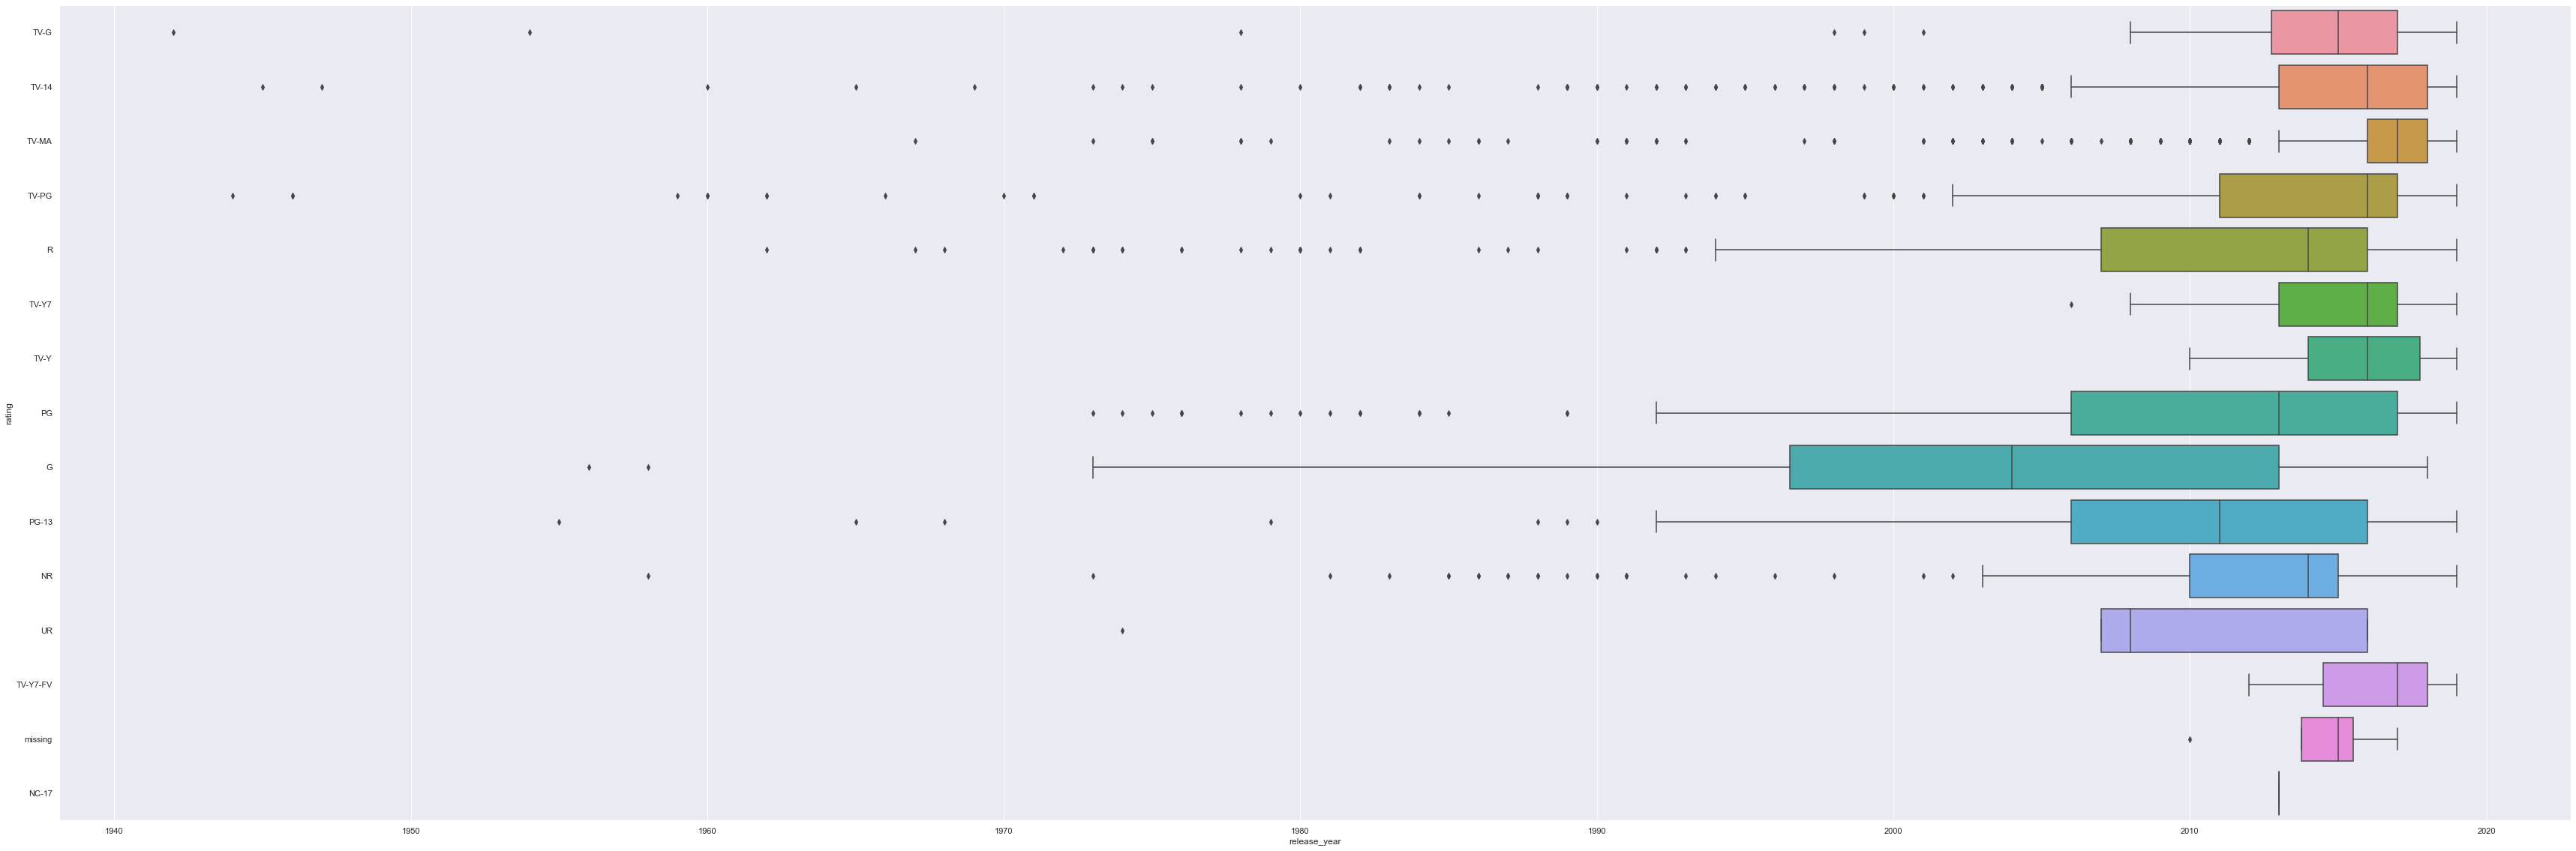

In [54]:
sns.boxplot(x="release_year", y="rating", data=netflix)

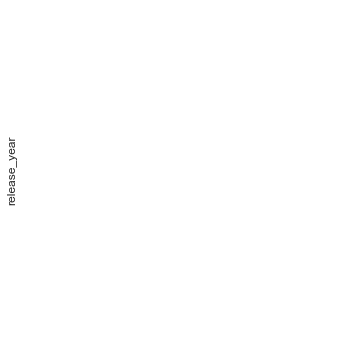

In [55]:
netflix[netflix['Genre 2'] == 'Action'].release_year.groupby(netflix.release_year).count().plot(kind='pie', figsize=(6, 6),autopct='%1.1f%%')
plt.axis('equal')
plt.show()